In [ ]:
# Import and mount to access drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Import required modules
import pandas as pd
import numpy as np

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
#ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating a dataframe
data_set = pd.read_csv("/gdrive/MyDrive/titanic.csv")

In [ ]:
# Data before pre-processing
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Info about data_set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Description about data_set
data_set.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



-> We see that the count for the columns **'Age'**, **'Cabin'** and **'Embarked'** are less than actual which means we have some ***missing data*** in them

-> **Lets now start pre-processing the data**

In [ ]:
# Amount of missing data
print("Percentage of missing values:")
print(((data_set.isna().sum())/data_set.shape[0])*100)

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


-> We can't ignore the 20% missing data of Age

-> Let's fill the missing values of age with the mean **but** categorised under which ***Pclass*** (passenger - class) they opted for as they are located at different locations in the Titanic and their **sex** as it matters in their biology

In [ ]:
# Lets groupby by sex and pclass only on age column
# Aggregated by their mean
# Finally rounding the age as float value is not that usefull
round(data_set.groupby(['Sex', 'Pclass'])['Age'].agg('mean'), 0)

Sex     Pclass
female  1         35.0
        2         29.0
        3         22.0
male    1         41.0
        2         31.0
        3         27.0
Name: Age, dtype: float64

In [ ]:
# As Age can't be negative lets
# replace NaN with -1 for easy access
data_set["Age"].fillna(-1, inplace = True)

# Iterating over rows of age to handle missing data
for data_index in range(data_set.shape[0]):
  if data_set["Age"][data_index] == -1:
    if ((data_set["Sex"][data_index] == "female") and (data_set["Pclass"][data_index] == 1)):
      data_set["Age"][data_index] = 35
    elif((data_set["Sex"][data_index] == "female") and (data_set["Pclass"][data_index] == 2)):
      data_set["Age"][data_index] = 29
    elif((data_set["Sex"][data_index] == "female") and (data_set["Pclass"][data_index] == 3)):
      data_set["Age"][data_index] = 22
    elif((data_set["Sex"][data_index] == "male") and (data_set["Pclass"][data_index] == 1)):
      data_set["Age"][data_index] = 41
    elif((data_set["Sex"][data_index] == "male") and (data_set["Pclass"][data_index] == 2)):
      data_set["Age"][data_index] = 31
    elif((data_set["Sex"][data_index] == "male") and (data_set["Pclass"][data_index] == 3)):
      data_set["Age"][data_index] = 27

In [ ]:
# Checking
data_set['Age'].isna().sum()

0

-> Now consider cabin (Room No : ), well it's pretty much obvious that it doesn't really depend on that so we can simply **drop this column**

In [ ]:
# Dropping the column
data_set.drop(columns = 'Cabin', inplace = True)

In [ ]:
# Checking
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

-> Lastly coming to Embarked as the missing percentage is very low [0.22] we can just drop those and be done this

In [ ]:
# Dropping the missing embarked values
data_set.dropna(inplace = True)
# As embarked are the only missing values left out


-> Now we see that there are some columns with information which is redundant

*   PassengerId
*   Name
*   Ticket

-> As the survival doesn't depend on these we can simply drop them


In [ ]:
# Dropping
data_set.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)

In [ ]:
# Checking
data_set.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='Fare'>

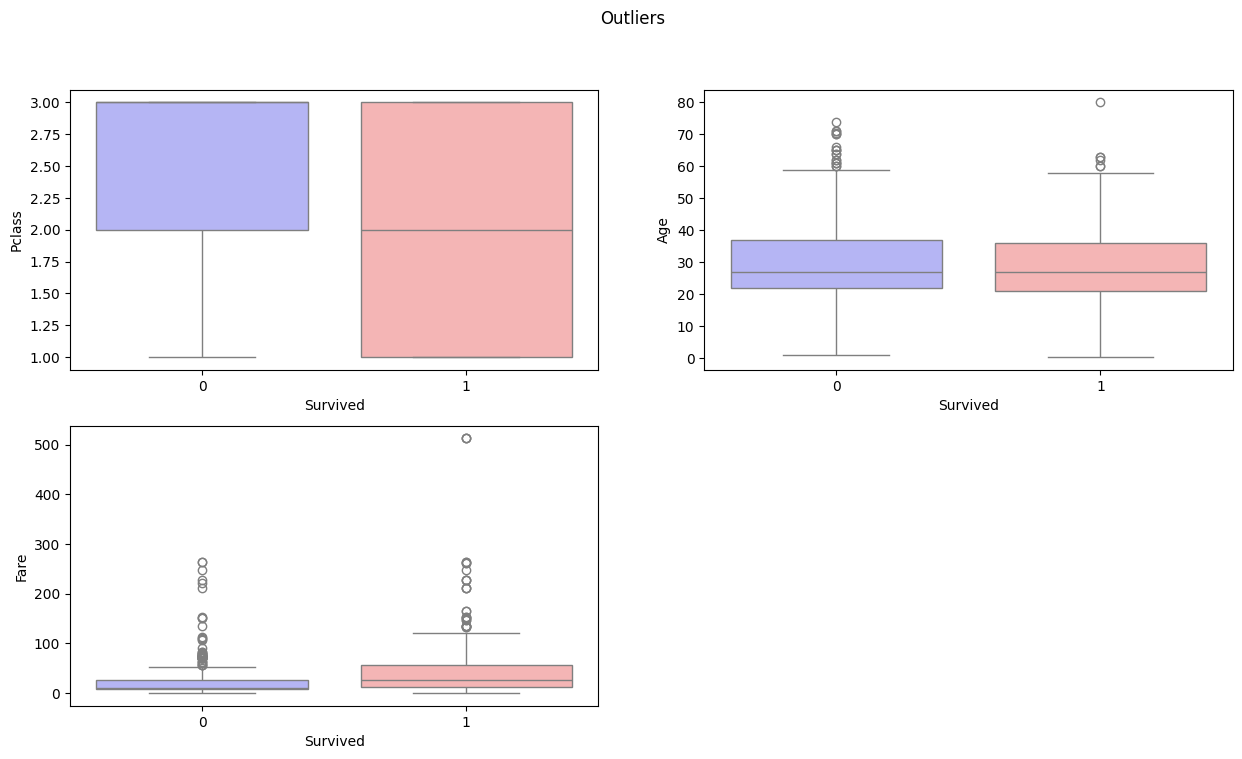

In [ ]:
# Checking for outliers
# We will use boxplot method
figure, axes = plt.subplots(2, 2, figsize = (15, 8))
figure.suptitle("Outliers")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = data_set, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = data_set, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = data_set, x = "Survived", y = "Fare", palette = "bwr")

In [ ]:
# Checking
data_set['Pclass'].unique()

array([3, 1, 2])

We conclude,

-> Pclass has 3 discrete values 1, 2, and 3. Hence, no outliers

-> Age: The plots has some data values above 60. This indicates older people travelling in the ship Hence not outliers

-> Fare values can be large depending on the services alloted so this is also not an outlier



#### Categorical Encoding

In [ ]:
# For sex
data_set["Sex"].replace("female", 0, inplace = True)
data_set["Sex"].replace("male", 1, inplace = True)

In [ ]:
# Checking
data_set['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [ ]:
# For embarked
# First lets see the uniques values in it
data_set['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
data_set['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [ ]:
#function to encode 'Embarked'
def encode_embarked(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

In [ ]:
#implement function
print("Column 'Embarked' before encoding:")
print(data_set["Embarked"][0:5])

data_set["Embarked"] = encode_embarked(list(data_set["Embarked"]))

print("Column 'Embarked' after encoding:")
print(data_set["Embarked"][0:5])

Column 'Embarked' before encoding:
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Column 'Embarked' after encoding:
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


In [ ]:
# Checking
data_set['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 889, dtype: int64

* Now we are done with the data pre-processing and the final data looks like

In [ ]:
data_set.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
518,1,2,0,36.0,1,0,26.0000,0
788,1,3,1,1.0,1,2,20.5750,0
250,0,3,1,27.0,0,0,7.2500,0
611,0,3,1,27.0,0,0,7.0500,0
76,0,3,1,27.0,0,0,7.8958,0
430,1,1,1,28.0,0,0,26.5500,0
90,0,3,1,29.0,0,0,8.0500,0
91,0,3,1,20.0,0,0,7.8542,0
535,1,2,0,7.0,0,2,26.2500,0
665,0,2,1,32.0,2,0,73.5000,0


In [ ]:
# Converting data in numpy array
x1 = data_set.drop(columns = 'Survived')
y1 = data_set['Survived']

In [ ]:
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
888,3,0,22.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


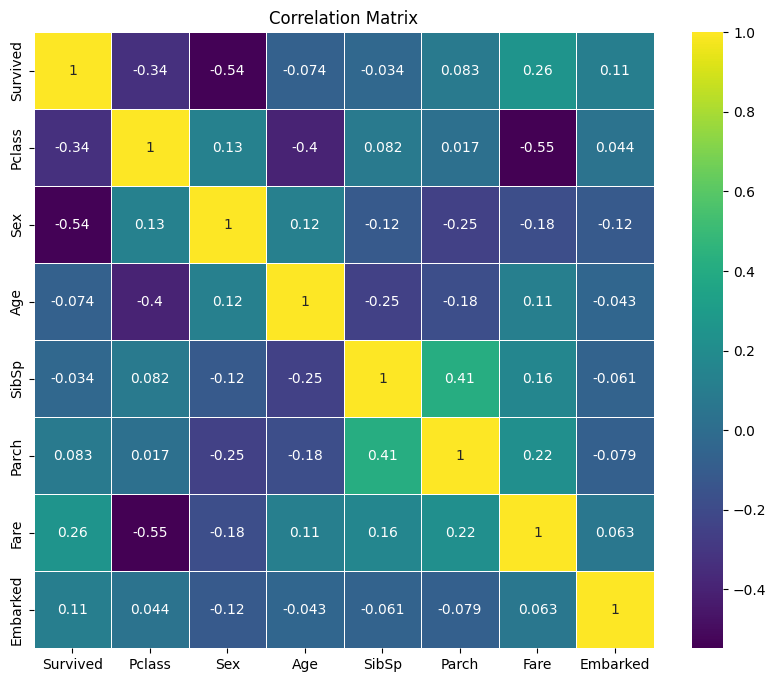

In [ ]:
# Correlation Matrix
correlation_matrix = data_set.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print()

In [ ]:
# Splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.9, random_state = 1)
x1_train, x1_vali, y1_train, y1_vali = train_test_split(x1_train, y1_train, train_size = 7 / 9, random_state = 1)

In [ ]:
# Checking
print(len(x1_train), len(x1_vali), len(x1_test))

622 178 89


* Implementing the entropy as the cost function to calculate the split.

In [ ]:
# In the code the traininig data is given in the form where both
# target an feature are both required
x1_train['Survived'] = list(y1_train)

In [ ]:
# Here we given a column of data as the parameter
def entropy(col):
    # Get each unique class of the column and count for each class to calculate probabilites
    counts = np.unique(col, return_counts = True)
    # Now counts has the unique elements and the count of those unique values as well
    N = float(col.shape[0])
    # N is total rows in the column
    entropy = 0.0

    for idx in counts[1]:
      # counts[1] here is array of counts of diff uniq elem
        prob = idx/N
        # Formula for entropy
        entropy += -1 * prob * np.log2(prob)
    return entropy

In [ ]:
# Ex
print(entropy(y1_train))

0.9553181541320138


* It is mentioned that the split has to be into two categories
* meaning binary tree //

In [ ]:
def conTocat(x, feature, fval):
  # Splitting data meaning one node splits into left
  # and right child nodes considering there is an
  # information gain
    x_right = pd.DataFrame([], columns = x.columns)
    x_left = pd.DataFrame([], columns = x.columns)

  # x_right and x_left are two empty dataframes which will be
  # built base on the val, the splitting condition which accounts
  # for the best/ most information gain
    for index, row in x.iterrows():
        val = x[feature].loc[index]

        if val > fval:
            x_right = x_right.append(x.loc[index])
        else:
            x_left = x_left.append(x.loc[index])

    return x_left, x_right

In [ ]:
# Ex
l, r = conTocat(x1_train, 'Sex', 0.5)
print(l)
print(r)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Survived
268     1.0  0.0  58.0    0.0    1.0  153.4625       0.0       1.0
396     3.0  0.0  31.0    0.0    0.0    7.8542       0.0       0.0
885     3.0  0.0  39.0    0.0    5.0   29.1250       2.0       0.0
1       1.0  0.0  38.0    1.0    0.0   71.2833       1.0       1.0
389     2.0  0.0  17.0    0.0    0.0   12.0000       1.0       1.0
..      ...  ...   ...    ...    ...       ...       ...       ...
457     1.0  0.0  35.0    1.0    0.0   51.8625       0.0       1.0
44      3.0  0.0  19.0    0.0    0.0    7.8792       2.0       1.0
205     3.0  0.0   2.0    0.0    1.0   10.4625       0.0       0.0
328     3.0  0.0  31.0    1.0    1.0   20.5250       0.0       1.0
167     3.0  0.0  45.0    1.0    4.0   27.9000       0.0       0.0

[222 rows x 8 columns]
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
137     1.0  1.0  37.0    1.0    0.0  53.1000       0.0       0.0
661     3.0  1.0  40.0    0.0    0.0   7

In [ ]:
def info_gain(x, fkey, fval):

    # After splitting the data we have to calc their IG
    # To select the best column as the next child node
    left,right = conTocat(x, fkey, fval)

    # Calculate percentages of samples in left and right
    l = float(left.shape[0])/x.shape[0]
    r = float(right.shape[0])/x.shape[0]

    # If all samples are in one side
    if l == 0.0 or r == 0.0:
        return -1 # least IG

    # entropy of parent class - weighted entropy of child class
    i_gain = entropy(x['Survived']) - (l*entropy(left['Survived']) + r*entropy(right['Survived']))

    return i_gain

In [ ]:
np.unique(x1_train['Pclass'])

array([1, 2, 3])

In [ ]:
print(info_gain(x1_train, 'Pclass', 1.5))

0.049829087341786926


In [ ]:
x1_train['Pclass'].loc[268]

1

In [ ]:
x1_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
268,1,0,58.0,0,1,153.4625,0,1
137,1,1,37.0,1,0,53.1000,0,0
396,3,0,31.0,0,0,7.8542,0,0
661,3,1,40.0,0,0,7.2250,1,0
179,3,1,36.0,0,0,0.0000,0,0
...,...,...,...,...,...,...,...,...
167,3,0,45.0,1,4,27.9000,0,0
7,3,1,2.0,3,1,21.0750,0,0
70,2,1,32.0,0,0,10.5000,0,0
227,3,1,20.5,0,0,7.2500,0,0


In [ ]:
# ex
# consider splitting all columns about their mean as fkey and then calc their IG
for col in x1_train.columns:
    print(col, ": ", info_gain(data_set, col, x1_train[col].mean()))

Pclass :  0.07475333655808347
Sex :  0.21600805853994398
Age :  0.0009289424649907563
SibSp :  0.009952927880859441
Parch :  0.01577756071262526
Fare :  0.040058516658397325
Embarked :  0.016352257508829737
Survived :  0.9597555341383497


In [ ]:
def aid(indii):
  sum = 0
  for i in indii:
    sum += y1_train['Survived'].loc[i]
    meaan = sum / len(indii)
  return meaan

In [ ]:
Dict = {'Pclass': 0, 'Sex' : 1, 'Age' : 2, 'SibSp' : 3, 'Parch' : 4, 'Fare' : 5, 'Embarked' : 6}

In [ ]:
class DecisionTree:

  def __init__(self, depth = 0):
    self.left = None
    self.right = None
    self.feature = None
    self.fval = None
    self.max_depth = None
    self.depth = depth
    self.target = None

  def train(self, X_train, max_depth):
    # Firstly fix the max depth
    self.max_depth = max_depth
      # Calc IG and fkey for all columns and then select the best
      # and then split ... PERFECTO
    features = X_train.columns
    info_gains = []
    indices = []
      # We iterate through each row and keep on trying with all fkey val
      # Till we get the best IG and then store it
    for feat in features:
      if(feat != "Survived"):
        i_gain = 0.0
        comp = 0.0
        ff = np.unique(X_train[feat])
        to_check = []
        for i in range(len(ff) - 1):
          to_check.append((ff[i] + ff[i + 1]) / 2)
        for t_c in to_check:
          i_g = info_gain(X_train, feat, t_c)
          if(i_g > i_gain):
            i_gain = i_g
            comp = t_c
        info_gains.append(i_gain)
        indices.append(comp)

    self.feature = features[np.argmax(info_gains)]
    self.fval = indices[np.argmax(info_gains)]

        # Split the data
    left, right = conTocat(X_train, self.feature, self.fval)
    # # Dropping the self.feature in the l and r df
    # left = left.drop(columns = self.feature)
    # right = right.drop(columns = self.feature)

    if left.shape[0] == 0 or right.shape[0] == 0:
      if X_train['Survived'].mean() >= 0.5:
        self.target = 'Survived'
      else:
        self.target = 'Dead'
      return



        # Stop early when max depth reached
    if self.depth >= self.max_depth:
      if X_train['Survived'].mean() >= 0.5:
        self.target = 'Survived'
      else:
        self.target = 'Dead'
      return

    self.left = DecisionTree(depth = self.depth+1)
    self.left.train(left, max_depth)
    self.right = DecisionTree(depth = self.depth+1)
    self.right.train(right, max_depth)

    if X_train['Survived'].mean() >= 0.5:
      self.target = 'Survived'
    else:
      self.target = 'Dead'
    return

  def Infer(self, y_test):
    # Base case
    if(self.left == None and self.right == None):
      if(self.target == 'Survived'):
        return 1
      elif(self.target == 'Dead'):
        return 0
    else:
      # We can still traverse
      if(y_test[Dict[self.feature]] < self.fval):
        if(self.left.feature == None):
          if(self.target == 'Survived'):
            return 1
          elif(self.target == 'Dead'):
            return 0
        else:
          return self.left.Infer(y_test)
      else:
        if(self.left.feature == None):
          if(self.target == 'Survived'):
            return 1
          elif(self.target == 'Dead'):
            return 0
        return self.right.Infer(y_test)

In [ ]:
lol = DecisionTree()

* I have taken height to be 5

In [ ]:
lol.train(x1_train, 5)

In [ ]:
xx_test = list(x1_test.to_numpy())
yy = list(y1_test.to_numpy())

In [ ]:
# list of pred data
y_pred = []
for i in range(len(x1_test)):
  y_pred.append(lol.Infer(xx_test[i]))

* For tasks 6, 7 and 8 I am gonna use sklearn

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, recall_score, f1_score

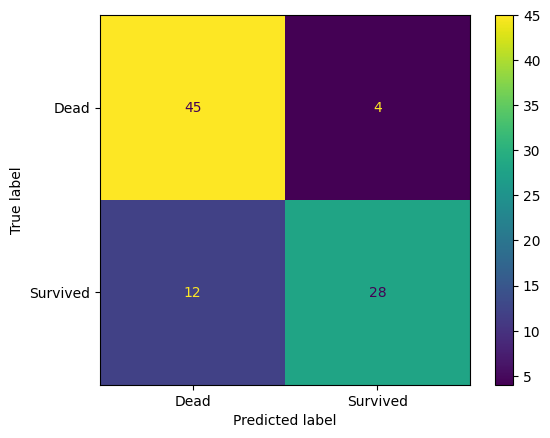

In [ ]:
# Confusion matrix

cm = confusion_matrix(yy, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Dead', 'Survived'])
cm_display.plot()
plt.show()

In [ ]:
# Precision
print(precision_score(yy, y_pred))

0.875


In [ ]:
# Recall
print(recall_score(yy, y_pred))

0.7


In [ ]:
# F1 score
print(f1_score(yy, y_pred))

0.7777777777777777


In [ ]:
yyy_pred = []
for i in range(len(x1_train)):
  yyy_pred.append(lol.Infer(list(x1_train.to_numpy())[i]))

In [ ]:
# accuracy score on train and test data
print("On train data : ", accuracy_score(list(y1_train.to_numpy()), yyy_pred))
print("On test data : ", accuracy_score(yy, y_pred))

On train data :  0.8553054662379421
On test data :  0.8202247191011236


In [ ]:
# Class wise accuracy on test data
# we will compute this with the help
# of confusion matrix
print("survived accuracy : ", 28 / 40)
print("dead accuracy : ", 45 / 49)

survived accuracy :  0.7
dead accuracy :  0.9183673469387755


In [ ]:
# Similarly on train data
cm1 = confusion_matrix(list(y1_train.to_numpy()), yyy_pred)
cm1

array([[359,  29],
       [ 61, 173]])

In [ ]:
# Class wise accuracy on train data
print("survived accuracy : ", 172 / (172 + 62))
print("dead accuracy : ", 358 / (358 + 30))

survived accuracy :  0.7350427350427351
dead accuracy :  0.9226804123711341
